# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503272 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069168 Eh
E = -1.136928959400571 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653277 Eh
E = -0.987392996293216 Eh
E = -0.9670259116093083 Eh
E = -0.9534242125062942 Eh
E = -0.9449089870950516 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283361 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411335862 Eh
E = -0.8397057843499789 Eh
E = -1.074887931719117 Eh
E = -1.1175258568986912 Eh
E = -1.0951595815644795 Eh
E = -1.0495617842752072 Eh
E = -0.9960202460350677 Eh
E = -0.9415475409906814 Eh
E = -0.8899750208893146 Eh
E = -0.8432718025417755 Eh
E = -0.8022428650141384 Eh
E = -0.7669825247359998 Eh
E = -0.7371545448988288 Eh
E = -0.7121961606082431 Eh
E = -0.6914700512624794 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436217 Eh
E = -0.8488985094851161 Eh
E = -1.0882310174307857 Eh
E = -1.1369333351418656 Eh
E = -1.1229593878059763 Eh
E = -1.0887606905920533 Eh
E = -1.050426089327126 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052735 Eh
E = -0.9670168314563374 Eh
E = -0.9534301294889956 Eh
E = -0.9449225613845066 Eh
E = -0.9398332746700124 Eh
E = -0.9368793989542732 Eh
E = -0.9351989265367034 Eh


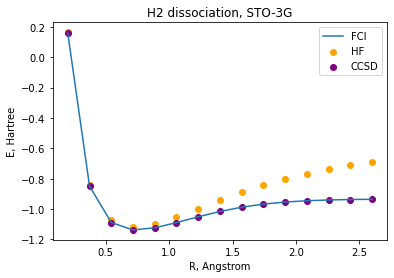

In [6]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7,15)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998414 Eh
E = -74.47523205268014 Eh
E = -74.90413378058017 Eh
E = -75.01383133956654 Eh
E = -75.00356512166928 Eh
E = -74.95170869126783 Eh
E = -74.89218648216018 Eh
E = -74.83923063661699 Eh
E = -74.79866365936574 Eh
E = -74.77161515186775 Eh
E = -74.75568947214684 Eh
E = -74.74704715251242 Eh
E = -74.74248898749448 Eh
E = -74.74007426712959 Eh
Could not converge


In [9]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321476 Eh
E = -74.45343797011796 Eh
E = -74.87055361047916 Eh
E = -74.96308510923626 Eh
E = -74.92817508740148 Eh
E = -74.84281942863211 Eh
E = -74.74051950148022 Eh
E = -74.63577758413845 Eh
E = -74.53576638656821 Eh
E = -74.44494384742121 Eh
E = -74.36975504260424 Eh
E = -74.29778481417813 Eh
E = -74.2416722005104 Eh
E = -74.27129957698466 Eh
Could not converge


In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918694 Eh
E = -74.47519485717145 Eh
E = -74.90406353010552 Eh
E = -75.01370018934803 Eh
E = -75.00330155818898 Eh
E = -74.95116757042634 Eh
E = -74.89128367467829 Eh
E = -74.83853401139109 Eh
E = -74.80070162376026 Eh
E = -74.7810573871734 Eh
E = -74.74394274758566 Eh
E = -74.77972801511767 Eh
E = -74.7833896345312 Eh
E = -74.64224434262873 Eh
Could not converge


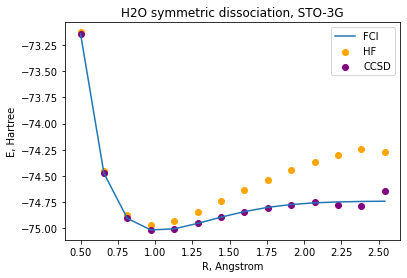

In [11]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

# LiH

In [12]:
bond_lengths = np.linspace(0.2,2.6,15)

In [13]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -4.041729928511248 Eh
E = -6.476001431266474 Eh
E = -7.178193643340489 Eh
E = -7.526498486565391 Eh
E = -7.712630400158973 Eh
E = -7.809958142660568 Eh
E = -7.858103655150282 Eh
E = -7.878453652319019 Eh
E = -7.882668561853681 Eh
E = -7.877535303598006 Eh
E = -7.867261893022058 Eh
E = -7.854568284484584 Eh
E = -7.841269334302725 Eh
E = -7.828604512640165 Eh
E = -7.8173999273756625 Eh


In [14]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -3.999938081850282 Eh
E = -6.442865006638948 Eh
E = -7.157727610056979 Eh
E = -7.507561971836502 Eh
E = -7.69493922797108 Eh
E = -7.793148010030828 Eh
E = -7.84129823610769 Eh
E = -7.86062131505413 Eh
E = -7.862747590802051 Eh
E = -7.854432789114544 Eh
E = -7.839814814258682 Eh
E = -7.821502044433597 Eh
E = -7.801168740856861 Eh
E = -7.779919081959606 Eh
E = -7.758519166159427 Eh


In [15]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -4.04162633762092 Eh
E = -6.475814567885648 Eh
E = -7.178151795208303 Eh
E = -7.526489297627454 Eh
E = -7.712624094698165 Eh
E = -7.809951465614481 Eh
E = -7.8580960299230584 Eh
E = -7.878444199417256 Eh
E = -7.882656692757964 Eh
E = -7.877520997837847 Eh
E = -7.867244957206116 Eh
E = -7.854547794592297 Eh
E = -7.8412435153040905 Eh
E = -7.828570729160714 Eh
E = -7.817355013474601 Eh


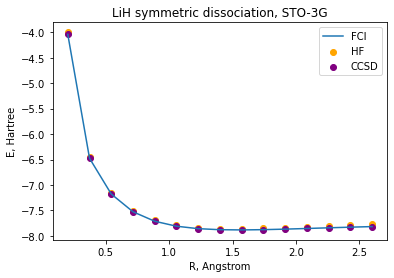

In [16]:
#Plot H2O PESs

plt.title('LiH symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

# N2

In [17]:
bond_lengths = np.linspace(0.2,2.6,15)

In [18]:
#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')

E = -52.69986446095194 Eh
E = -91.87219185078362 Eh
E = -102.2786719579453 Eh
E = -105.94833375840682 Eh
E = -107.23800585900072 Eh
E = -107.62241574492502 Eh
E = -107.67515353234205 Eh
E = -107.62317417753665 Eh
E = -107.55289172359613 Eh
E = -107.496874800021 Eh
E = -107.46420175492655 Eh
E = -107.44936190838023 Eh
E = -107.44346235096512 Eh
E = -107.44101665596342 Eh
E = -107.43978533350808 Eh


In [19]:
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')

E = -52.640880298460615 Eh
E = -91.84096976738088 Eh
E = -102.23582532936804 Eh
E = -105.87852515724785 Eh
E = -107.13547475524209 Eh
E = -107.47746897715538 Eh
E = -107.47595793024246 Eh
E = -107.35803638094183 Eh
E = -107.21006012882265 Eh
E = -107.0636344260522 Eh
E = -106.93111396491545 Eh
E = -106.8172657846279 Eh
E = -106.72253280940099 Eh
E = -106.64502351849862 Eh
E = -106.58220314532048 Eh


In [ ]:
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

E = -52.6936422207812 Eh
E = -91.87202243484072 Eh
E = -102.27832509048126 Eh
E = -105.9475382618132 Eh
E = -107.2363993445268 Eh
E = -107.61913600016209 Eh
E = -107.66856287103089 Eh
E = -107.61164794617068 Eh
E = -107.53930359304915 Eh
E = -107.50097935919904 Eh
E = -107.52961059502304 Eh


In [ ]:
#Plot N2 PESs

plt.title('N2 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()